In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [53]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
x_train,y_train

(array([[ 1.8925893 ,  1.52189404],
        [ 0.1250379 ,  0.03213212],
        [ 0.9106163 , -1.31157471],
        [-1.34792161, -1.48684082],
        [-0.169554  , -0.58129926],
        [-0.56234321,  2.33980255],
        [ 1.0088136 , -1.19473064],
        [-0.75873781,  1.08372877],
        [ 2.1871812 , -1.04867555],
        [ 0.0268406 , -0.25997806],
        [-0.46414591, -1.1363086 ],
        [ 0.1250379 ,  0.03213212],
        [ 1.6961947 , -0.90262046],
        [ 1.1070109 , -0.90262046],
        [ 0.5178271 ,  1.22978386],
        [-1.05332971, -1.4576298 ],
        [-1.15152701, -1.54526286],
        [-0.0713567 ,  0.67477452],
        [ 0.4196298 , -0.46445519],
        [-0.2677513 , -0.25997806],
        [-0.85693511,  0.14897619],
        [ 0.0268406 ,  0.29503128],
        [ 0.7142217 , -1.28236369],
        [ 1.5979974 ,  1.11293979],
        [ 0.812419  , -1.36999675],
        [-1.44611891, -1.22394166],
        [-0.0713567 ,  0.14897619],
        [ 0.4196298 , -0.143

##### Steps

* Separate the data by class
* Calculate class probabilities
* Calculate likelihood
* Calculate posterior probability
* Predict the class

#### Formula:

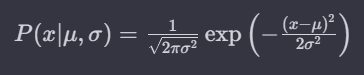

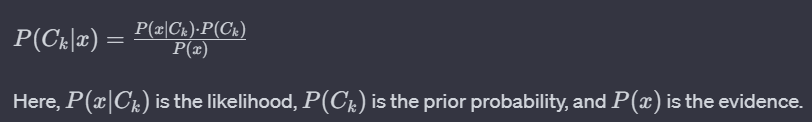

In [71]:
from scipy.stats import norm

class GNB:
    def fit(self, x, y):
        self.classes = np.unique(y)
        self.probs = {}
        self.means = {}
        self.stds = {}

        # Separate unique classes data
        for c in self.classes:
            data = x[y == c]
            self.probs[c] = len(data) / len(y)
            self.means[c] = np.mean(data, axis=0)
            self.stds[c] = np.std(data, axis=0)

    def log_likelihood(self, x, mean, std):
        exponent = -0.5 * ((x - mean) / std)**2
        log_likelihood = -np.log(np.sqrt(2 * np.pi) * std) + exponent
        return log_likelihood

    def log_posterior(self, x, c):
        log_likelihoods = [np.sum(self.log_likelihood(x[i], self.means[c][i], self.stds[c][i])) for i in range(len(x))]
        log_prior = np.log(self.probs[c])
        log_posterior = log_likelihoods + log_prior
        return np.sum(log_posterior)

    def predict(self, x):
        predictions = []
        for i in x:
            posterior_probs = [self.log_posterior(i, c) for c in self.classes]
            predicted_class = self.classes[np.argmax(posterior_probs)]
            predictions.append(predicted_class)

        return np.array(predictions)


In [72]:
gb = GNB()
gb.fit(x_train,y_train)

In [73]:
y_pred = gb.predict(x_test)

In [75]:
gb.predict(sc.fit_transform([[30,87000]]))

array([0], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_pred,y_test)

[[63  0]
 [12 25]]


0.88

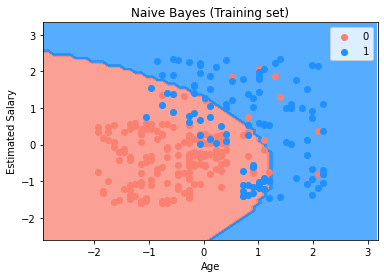

In [79]:
from matplotlib.colors import ListedColormap


X_set, y_set = x_train, y_train
h = 0.1

x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = gb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(('salmon', 'dodgerblue')), alpha=0.75)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.xlim(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1)
plt.ylim(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


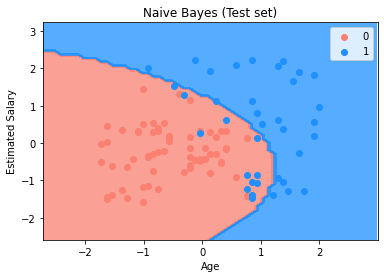

In [80]:
from matplotlib.colors import ListedColormap


X_set, y_set = x_test, y_test
h = 0.1

x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = gb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(('salmon', 'dodgerblue')), alpha=0.75)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.xlim(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1)
plt.ylim(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1)

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
